# **Logistic Regression**
"En este laboratorio, aprenderás sobre el modelo de regresión logística y practicarás con él. La regresión logística es un modelo popular y efectivo para la clasificación. Comprenderla y saber cómo aplicarla a tareas de clasificación es esencial, ya que los modelos de regresión logística forman los fundamentos de las redes neuronales."

Utilizaremos un conjunto de datos del mundo real que contiene información nutricional detallada sobre alimentos para personas con diabetes. El objetivo es clasificar si un paciente diabético debería elegir un alimento específico Más Frecuentemente, Menos Frecuentemente o con Moderación, basado en la información nutricional del conjunto de datos.


## Objetivos

Después de completar este laboratorio, podrás:

*   Preprocesar y generar conjuntos de datos de entrenamiento y prueba.
*   Entrenar y ajustar modelos de regresión logística.
*   Interpretar modelos de regresión logística entrenados.
*   Evaluar modelos de regresión logística entrenados.

## Preparar y configurar el entorno del laboratorio

In [2]:
# Todas las bibliotecas necesarias para este laboratorio están listadas a continuación. Las bibliotecas preinstaladas en Skills Network Labs están comentadas.
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0
# Nota: Si tu entorno no soporta "!mamba install", usa "!pip install"


In [3]:
#!pip install -U scikit-learn

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# también establece un estado aleatorio
rs = 123

### Análisis Exploratorio de Datos (EDA) e Ingeniería de Características

Antes de llegar a la implementación del modelo, es esencial examinar el conjunto de datos y seleccionar cuidadosamente las características que servirán como entradas para el modelo.

### Cargar y explorar el conjunto de datos

Primero, carguemos el conjunto de datos como un dataframe de `Pandas` y realicemos algunas tareas básicas de EDA en él.


In [6]:
# Cargamos el dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items.csv"
food_df = pd.read_csv(dataset_url)

Y, revisemos rápidamente los tipos de columnas.

In [7]:
food_df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

In [8]:
food_df.head(10)

Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0     149.0          0            0.0                  0.0   
1     123.0          0            0.0                  0.0   
2     150.0          0            0.0                  0.0   
3     110.0          0            0.0                  0.0   
4     143.0          0            0.0                  0.0   
5     110.0          0            0.0                  0.0   
6     142.0          0            0.0                  0.0   
7     102.0          0            0.0                  0.0   
8     145.0          0            0.0                  0.0   
9     171.0          0            0.0                  0.0   

   Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  Total Carbohydrate  \
0                  0.0        0.0            0     9.0                 9.8   
1                  0.0        0.0            0     5.0                 6.6   
2                  0.0        0.0            0     4.0                11.4   
3                  0.0        0.0            0     6.0                 7.0   
4                  0.0        0.0            0     7.0                13.1   
5                  0.0        0.0            0     6.0                 7.0   
6                  0.0        0.0            0    12.0                10.6   
7                  0.0        0.0            0    13.0                 5.0   
8                  0.0        0.0            0    17.0                11.0   
9                  0.0        0.0            0     8.0                13.7   

   Dietary Fiber  Sugars  Sugar Alcohol  Protein  Vitamin A  Vitamin C  \
0            0.0     0.0              0      1.3          0          0   
1            0.0     0.0              0      0.8          0          0   
2            0.0     0.0              0      1.3          0          0   
3            0.0     0.0              0      0.8          0          0   
4            0.0     0.0              0      1.0          0          0   
5            0.0     0.0              0      0.8          0          0   
6            0.0     0.0              0      1.2          0          0   
7            0.0     0.0              0      0.7          0          0   
8            0.0     0.0              0      1.2          0          0   
9            0.0     0.0              0      2.5          0          0   

   Calcium  Iron            class  
0        0     0  'In Moderation'  
1        0     0  'In Moderation'  
2        0     0  'In Moderation'  
3        0     0  'In Moderation'  
4        0     0  'In Moderation'  
5        0     0  'In Moderation'  
6        0     0  'In Moderation'  
7        0     0  'In Moderation'  
8        0     0  'In Moderation'  
9        0     0  'In Moderation'

Obtén las entradas de las filas con la columna 0 hasta -1 (16).

In [9]:
feature_cols = list(food_df.iloc[:, :-1].columns)
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

obtener la estadística descriptiva

In [10]:
food_df.iloc[:, :-1].describe()

Calories     Total Fat  Saturated Fat  Monounsaturated Fat  \
count  13260.000000  13260.000000   13260.000000         13260.000000   
mean     133.861086      4.475264       1.450617             0.338069   
std       94.227650      5.386340       2.410318             1.345852   
min        0.000000      0.000000       0.000000             0.000000   
25%       70.000000      0.000000       0.000000             0.000000   
50%      120.000000      3.000000       0.500000             0.000000   
75%      180.000000      7.000000       2.000000             0.000000   
max     2210.000000     43.000000      22.000000            40.000000   

       Polyunsaturated Fat     Trans Fat   Cholesterol        Sodium  \
count         13260.000000  13260.000000  13260.000000  13260.000000   
mean              0.254660      0.047459      8.857692    241.867142   
std               2.230586      0.321402     20.976530    272.284363   
min               0.000000      0.000000      0.000000      0.000000   
25%               0.000000      0.000000      0.000000     40.000000   
50%               0.000000      0.000000      0.000000    135.000000   
75%               0.000000      0.000000     10.000000    370.000000   
max             235.000000     11.000000    450.000000   2431.000000   

       Total Carbohydrate  Dietary Fiber        Sugars  Sugar Alcohol  \
count        13260.000000   13260.000000  13260.000000   13260.000000   
mean            18.232020       1.602971      6.645234       0.117949   
std             14.786316       3.363879      8.328465       1.121529   
min              0.000000       0.000000      0.000000       0.000000   
25%              5.000000       0.000000      0.000000       0.000000   
50%             17.000000       1.000000      3.000000       0.000000   
75%             27.000000       2.000000     11.000000       0.000000   
max            270.000000     305.000000    115.000000      31.000000   

            Protein     Vitamin A     Vitamin C       Calcium          Iron  
count  13260.000000  13260.000000  13260.000000  13260.000000  13260.000000  
mean       4.661333      6.287632      6.741855      5.175264      5.235671  
std        5.611143     18.374191     23.785100      8.779637      9.119459  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000      0.000000      0.000000  
50%        3.000000      0.000000      0.000000      2.000000      2.000000  
75%        7.000000      6.000000      2.000000      6.000000      8.000000  
max       70.000000    622.000000   1000.000000    110.000000    170.000000

Como podemos ver en la salida anterior, este conjunto de datos contiene 17 categorías de nutrientes sobre cada alimento. Estas categorías incluyen Calorías, Grasa Total, Proteínas, Azúcar, etc., y están listadas como variables numéricas. Por lo tanto, solo necesitamos escalar estas variables para entrenar nuestro modelo de regresión logística, de manera que podamos comparar directamente los coeficientes de nuestras características. Esto se realizará en la sección de ingeniería de características.

Next, let's check the target variable in the `class` column to see the label values and their distribution.

In [11]:
# Obtén las entradas de las filas con la última columna 'class'
food_df.iloc[:,-1:].value_counts(normalize=True)

class          
'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
Name: proportion, dtype: float64

<Axes: xlabel='class'>

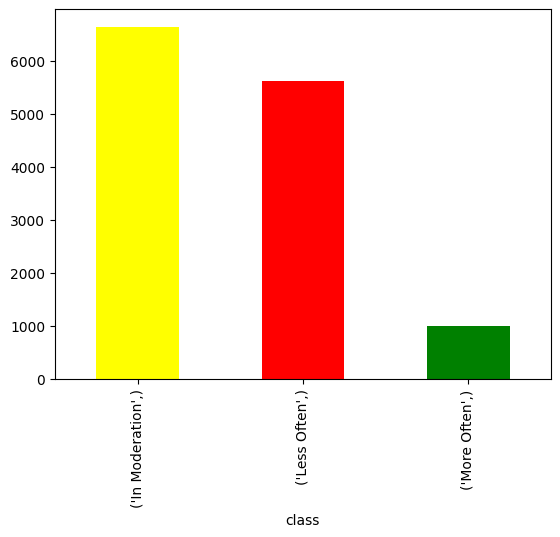

In [12]:
food_df.iloc[:, -1:].value_counts().plot.bar(color=['yellow', 'red', 'green'])

Como podemos ver en el gráfico de barras anterior, este conjunto de datos tiene tres clases: `En Moderación`, `Menos Frecuentemente` y `Más Frecuentemente`. Las tres etiquetas están desequilibradas. Para los pacientes diabéticos, la mayoría de los alimentos se encuentran en las categorías de En Moderación y Menos Frecuentemente. Esto hace que la gestión de la dieta para la diabetes sea muy difícil, por lo que podríamos construir un modelo de aprendizaje automático para ayudar a los pacientes a elegir sus alimentos.

Tenemos tres etiquetas, lo que significa que nuestro modelo de regresión logística será multinomial con tres clases.

Una regresión logística multinomial es un modelo de regresión logística generalizado que genera una distribución de probabilidad sobre todas las clases, basada en los logits o logaritmos exponenciales calculados para cada clase (generalmente más de dos).

También hay que notar que un modelo de regresión logística multinomial es diferente de la regresión logística binaria `uno contra el resto`. Para el esquema `uno contra el resto`, necesitas entrenar un clasificador independiente para cada clase. Por ejemplo, necesitas un clasificador de `Más Frecuentemente` para diferenciar un alimento entre `Más Frecuentemente` y `No Más Frecuentemente` (o, `En Moderación` y `Menos Frecuentemente`).

### Ingeniería de Características

Ahora deberías tener una comprensión básica sobre el conjunto de datos de alimentos. A continuación, procesemos el conjunto de datos en bruto y construyamos los datos de entrada `X` y las etiquetas/salidas `y` para el entrenamiento del modelo de regresión logística.

In [13]:
X_raw = food_df.iloc[:,:-1]
y_raw = food_df.iloc[:, -1:]

Afortunadamente, todas las columnas de características son numéricas, por lo que solo necesitamos escalarlas. Aquí usamos el `MinMaxScaler` proporcionado por `sklearn` para el escalado.

In [14]:
# Crea el objeto MinMaxScaler
scaler = MinMaxScaler()

In [15]:
# Escalado de las características de entrada en bruto
X = scaler.fit_transform(X_raw)

Vamos a comprobar el rango de valores de las características escaladas:

In [16]:
print(f'The range of feature inputs are within {X.min()} to {X.max()}')

The range of feature inputs are within 0.0 to 1.0


Para la variable objetivo `y`, usaremos el `LabelEncoder` proporcionado por `sklearn` para codificar sus tres valores de clase.

In [17]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

In [18]:
# Codificar la variable objetivo
y= label_encoder.fit_transform(y_raw.values.ravel())
# Nota: La función `ravel()` aplana el vector.

La variable objetivo codificada solo contendrá los valores 0 = En Moderación, 1 = Menos A Menudo, 2 = Más A Menudo.

In [19]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([6649, 5621,  990], dtype=int64))

## Entrenar modelos de regresión logística

Primero, vamos a dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se usará para entrenar y (posiblemente) ajustar los modelos, y el conjunto de prueba se usará para evaluar los modelos. Ten en cuenta que también puedes dividir el conjunto de entrenamiento en conjuntos de entrenamiento y validación, donde el conjunto de validación se usa únicamente para ajustar el modelo y establecer los parámetros del modelo.

In [20]:
# Primero, dividamos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=rs)

Vamos a observar las formas de los conjuntos de datos divididos:


In [23]:
print(f'Forma del conjunto de entrenamiento, X_train: {X_train.shape}. y_train: {y_train.shape}')

Forma del conjunto de entrenamiento, X_train: (10608, 17). y_train: (10608,)


In [22]:
print(f'Forma del conjunto de prueba, X_test: {X_test.shape}. y_test: {y_test.shape}')

Forma del conjunto de prueba, X_test: (2652, 17). y_test: (2652,)


Bien, ahora que tenemos listos los conjuntos de datos de entrenamiento y prueba, comencemos con la tarea de entrenamiento del modelo.

Primero definimos un modelo `sklearn.linear_model.LogisticRegression` con los siguientes argumentos. Puedes consultar el comentario para cada argumento para saber su significado.

In [31]:
# Penalización L2 para reducir los coeficientes sin eliminar ninguna característica del modelo
penalty='l2'

# Nuestro problema de clasificación es multinomial
multi_class = 'multinomial'

# Utilizar lbfgs para la penalización L2 y clases multinomiales
solver = 'lbfgs'

# Iteración Maxima = 1000
max_iter = 1000

In [32]:
# Define un modelo de regresión logística con el modelo de arriba
l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

Vamos a entrenar el modelo con los datos de entrada de entrenamiento `X_train` y las etiquetas `y_train`:

In [33]:
l2_model.fit(X_train,y_train)

c:\Users\snake_000\Desktop\Cursos-IBM\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [34]:
l2_preds = l2_model.predict(X_test)

Como es posible que necesitemos evaluar el modelo múltiples veces con diferentes hiperparámetros, definimos un método utilitario que toma las verdades reales `y_test` y las predicciones `preds`, y devuelve un `dict` de Python con `accuracy`, `recall`, `precision` y `f1score`.


In [37]:
def evaluate_metrics(yt,yp):
    results_pos = {}
    results_pos['accuracy']= accuracy_score(yt,yp)
    precision,recall, f_beta,_=precision_recall_fscore_support(yt,yp)
    results_pos['recall']=recall
    results_pos['precision']=precision
    results_pos['f1score']=f_beta
    return results_pos

In [38]:
evaluate_metrics(y_test,l2_preds)

{'accuracy': 0.7748868778280543,
 'recall': array([0.87368421, 0.73220641, 0.35353535]),
 'precision': array([0.73035827, 0.83553299, 0.92105263]),
 'f1score': array([0.79561794, 0.78046468, 0.51094891])}

Como podemos ver en los resultados de la evaluación anterior, el modelo de regresión logística tiene un rendimiento relativamente bueno en esta tarea de clasificación multinomial. La precisión general es de aproximadamente `0.77` y el f1score es de alrededor de `0.8`. Tenga en cuenta que para `recall`, `precision` y `f1score`, mostramos los valores para cada clase para ver cómo se desempeña el modelo en una clase individual. Y, como podemos ver en los resultados, el recall para `class=2` (More often) no es muy bueno. Este es, de hecho, un problema común llamado desafío de clasificación desequilibrada. Presentaremos soluciones a este problema más adelante en este curso.


A continuación, intentemos definir otro modelo de regresión logística esta vez con penalización L1, para ver si nuestra capacidad de clasificación mejora.

In [40]:
# Penalización L1 para reducir los coeficientes sin eliminar ninguna característica del modelo
penalty='l1'

# Nuestro problema de clasificación es multinomial
multi_class='multinomial'

# Usa `saga` para la penalización L1 y las clases multinomiales
solver='saga'

# Max iteration = 1000
max_iter=1000

Luego, definimos otro modelo de regresión logística con los argumentos anteriores utilizando penalización L1 y el solucionador correspondiente.

In [43]:
# Define un modelo de regresión logística con los argumentos anteriores.
l1_model=LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver,max_iter=max_iter)

Podemos comenzar a entrenar el nuevo `l1_model` con el nuevo conjunto de datos de entrenamiento.

In [44]:
l1_model.fit(X_train,y_train)

c:\Users\snake_000\Desktop\Cursos-IBM\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=123, solver='saga')

Y, realizar predicciones utilizando los datos de entrada en el conjunto de prueba.

In [45]:
l1_preds= l1_model.predict(X_test)

También podemos verificar la distribución de probabilidades por clase utilizando la función `predict_proba`. Por ejemplo, queremos ver las probabilidades de pertenecer a cada clase para la primera instancia en el conjunto de prueba:

In [46]:
odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
odd_ratios

array([3.55065558e-02, 9.64491964e-01, 1.47991419e-06])

Podemos ver que la Clase 1 tiene la probabilidad más alta, 0.96. Por lo tanto, la predicción del modelo para esta instancia será la clase `1`, lo cual es consistente con el método `predict`.

In [47]:
l1_model.predict(X_test[:1, :])[0]

1

Dado las etiquetas verdaderas (`y_test`) y las predicciones, podemos evaluar el rendimiento del modelo llamando al método de utilidad `evaluate_metrics`.

In [48]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8092006033182504,
 'recall': array([0.85488722, 0.74377224, 0.87373737]),
 'precision': array([0.78848821, 0.83516484, 0.8277512 ]),
 'f1score': array([0.82034632, 0.78682353, 0.85012285])}

Ahora, podemos ver que esta regresión logística con penalización L1 tiene un rendimiento mucho mejor que la L2. Una posible razón es que la penalización L1 puede eliminar algunas variables de características correlacionadas al reducir sus coeficientes a cero. Como resultado, el modelo se simplifica mucho para evitar el sobreajuste en los datos de entrenamiento y se alinea mejor con la suposición de la regresión logística de que todas las características deben ser independientes.

### Matriz de Confusión

La matriz de confusión es una herramienta utilizada para evaluar el rendimiento de un modelo de clasificación. Muestra el número de predicciones correctas e incorrectas clasificadas por cada clase, lo que permite identificar el tipo de errores que el modelo está cometiendo. 

En una matriz de confusión:
- **Verdaderos Positivos (VP)**: Casos que son positivos y fueron correctamente clasificados como positivos.
- **Falsos Positivos (FP)**: Casos que son negativos pero fueron clasificados incorrectamente como positivos.
- **Verdaderos Negativos (VN)**: Casos que son negativos y fueron correctamente clasificados como negativos.
- **Falsos Negativos (FN)**: Casos que son positivos pero fueron clasificados incorrectamente como negativos.

La matriz de confusión ayuda a calcular métricas de rendimiento como la precisión, el recall y la puntuación F1 para cada clase.

También podemos trazar la matriz de confusión basada en las etiquetas verdaderas y las predicciones utilizando el método `confusion_matrix` proporcionado por `sklearn`.

In [49]:
cf = confusion_matrix(y_test, l1_preds, normalize='true')

y visualizarla fácilmente utilizando el método de mapa de calor proporcionado por seaborn.

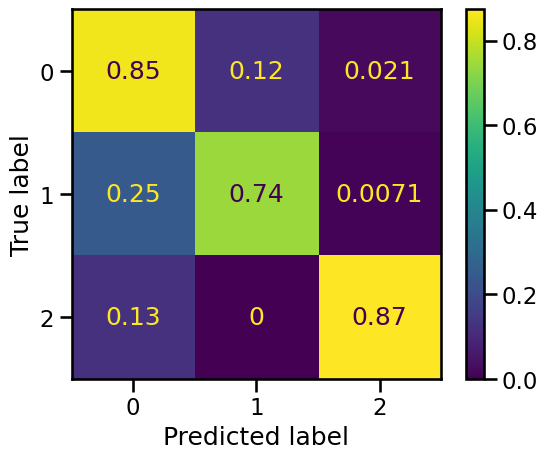

In [50]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1_model.classes_)
disp.plot()
plt.show()

### Interpretar modelos de regresión logística

Una forma de interpretar los modelos de regresión logística es analizando los coeficientes de las características. Aunque puede no ser tan efectivo como en los modelos de regresión lineal regular debido a que el modelo de regresión logística utiliza una función sigmoide, aún podemos obtener una idea de la importancia o impacto de cada característica.

Podemos revisar los coeficientes del modelo de regresión logística utilizando su atributo `coef_`:

In [51]:
l1_model.coef_

array([[ 1.02260612e+01,  0.00000000e+00,  0.00000000e+00,
         5.28211590e+00,  0.00000000e+00, -3.70560617e+00,
         0.00000000e+00,  9.11923717e-01,  0.00000000e+00,
         2.26627496e+01,  0.00000000e+00,  0.00000000e+00,
         4.30564271e+00,  1.36942545e-01,  0.00000000e+00,
         1.83340368e+00, -2.06761520e-02],
       [ 0.00000000e+00,  4.20223530e+00,  2.46648466e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.94277520e+00,  0.00000000e+00,  1.32251480e+00,
        -6.79834695e+00,  1.51669845e+01,  3.46648083e+00,
         0.00000000e+00, -1.71144958e+00,  0.00000000e+00,
        -1.47866235e-01,  0.00000000e+00],
       [-1.11431018e+02, -2.91410454e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.59642876e+00, -4.13437893e+01,
         0.00000000e+00, -9.27079323e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

El atributo `coef_` es una lista de coeficientes con tres elementos, donde cada elemento corresponde al coeficiente real para la clase 0, 1 o 2. Para analizar mejor los coeficientes, utilicemos tres métodos de utilidad para ordenarlos y visualizarlos.

In [56]:
# Extraer y ordenar los coeficientes de características
def get_feature_coef(regression_model, label_index, columns):
    coef_dict={}
    for coef, feat in zip(regression_model.coef_[label_index, :],columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Ordenar los coeficientes
    coef_dict = {k: v for k , v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generar colores para las barras basados en si el valor es negativo o positivo
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualiza el coeficiente
def visualize_coef(coef_dict):
    features = list(coef_dict.keys())
    values= list(coef_dict.values())
    y_pos = np.arange(len(features))
    colo_vals= get_bar_colors(values)
    plt.rcdefaults()
    fig, ax= plt.subplots()
    ax.barh(y_pos, values, align='center', color=colo_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    
    # etiquetas leídas de arriba hacia abajo
    ax.invert_yaxis()
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()


Luego, visualicemos el coeficiente ordenado para la clase 1, la clase "Menos A Menudo".

In [57]:
# Obtener los coeficientes para la Clase 1, Menos A Menudo
coef_dict = get_feature_coef(l1_model, 1, feature_cols)

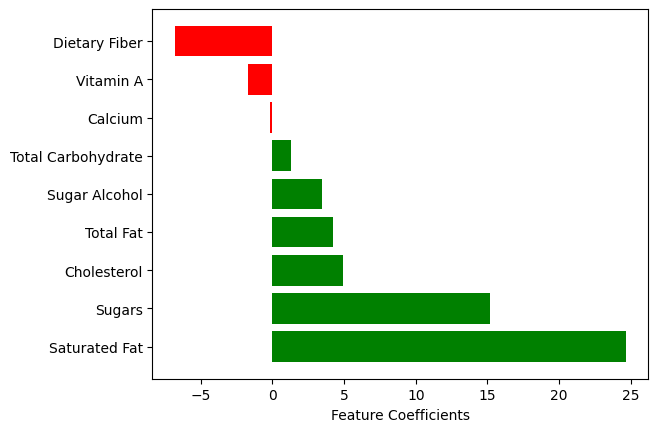

In [58]:
visualize_coef(coef_dict)

Como podemos ver, nutrientes poco saludables como la grasa saturada, los azúcares, el colesterol, la grasa total, etc., tienen coeficientes positivos altos. Los alimentos que contienen nutrientes poco saludables tendrán coeficientes más altos y serán más propensos a ser clasificados en la categoría de 'Menos A Menudo'.

A continuación, veamos los coeficientes para la Clase 2, `Más A Menudo`:

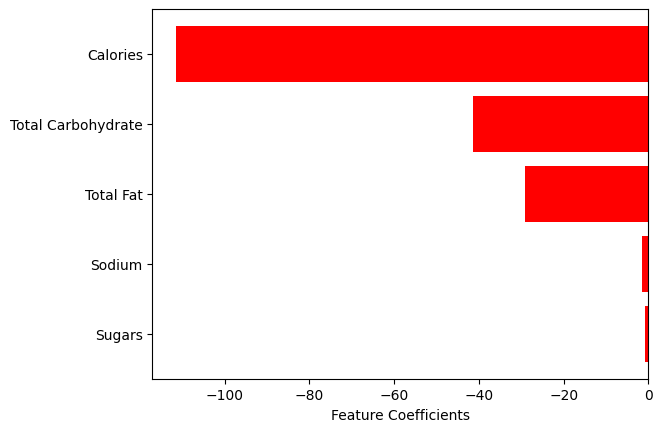

In [59]:
# Coeficiente para la Clase 2
coef_dict = get_feature_coef(l1_model,2,feature_cols)
visualize_coef(coef_dict)

Por el contrario, si un alimento tiene una alta cantidad de calorías, carbohidratos totales y grasa total, es poco probable que se clasifique en la categoría 'Más A Menudo'.


## Ejercicio de Codificación: Entrenar y evaluar un modelo de regresión logística con penalización elastic-net

Ahora, es tu turno de seguir el proceso completo de definir, construir, evaluar e interpretar un modelo de regresión logística.

### Define una regresión logística con penalización elastic-net

In [66]:
# Escribe tu código aquí
# PISTA: sklearn solo admite el solucionador 'saga' para la penalización elastic-net
# y necesitas establecer otro valor de l1_ratio dentro del rango 0 < l1_ratio < 1, para usar realmente elastic-net

penalty = 'elasticnet'
l1_ratio=0.1
multi_class = 'multinomial'
solver = 'saga'
max_iter = 1000

l1_model= LogisticRegression(random_state=rs, penalty=penalty, l1_ratio=l1_ratio,multi_class=multi_class, solver=solver, max_iter=max_iter)

Entrena el modelo con los datos de entrenamiento



In [67]:
l1_model = l1_model.fit(X_train,y_train)

c:\Users\snake_000\Desktop\Cursos-IBM\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Evaluar el modelo usando exactitud (accuracy), precisión (precision), exhaustividad (recall) y F1score

In [68]:
l1_preds = l1_model.predict(X_test)
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.7782805429864253,
 'recall': array([0.87218045, 0.73220641, 0.40909091]),
 'precision': array([0.73510773, 0.83553299, 0.91011236]),
 'f1score': array([0.79779917, 0.78046468, 0.56445993])}

### Graficar la matriz de confusión

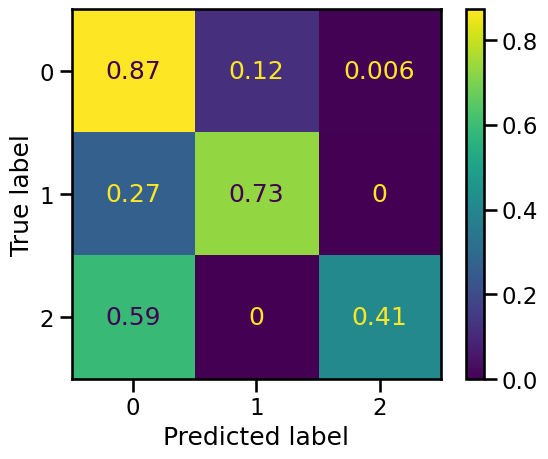

In [69]:
# Escribe tu código aqui
cf = confusion_matrix(y_test, l1_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=l1_model.classes_)
disp.plot()
plt.show()

### Interpretar el modelo analizando sus coeficientes


In [70]:
l1_model.coef_

array([[  9.15810399,   2.22172948,  -8.46265731,   2.76222366,
          0.50320521,  -1.67053615,  -1.78026664,   0.79685408,
          5.3360428 ,   2.63284818,  -3.14601493,  -0.98976522,
          5.02830075,   0.88304781,   0.        ,   1.61472761,
          1.1203008 ],
       [  2.60296274,   6.54796935,  11.47623515,  -1.93546342,
         -0.39995636,   1.81110856,   3.2766088 ,  -0.07586326,
          4.49310396,  -2.02800432,  10.46752591,   2.20413844,
          0.27024807,  -1.31967965,   0.        ,   0.3788244 ,
          0.29721941],
       [-11.87162088,  -8.88017086,  -2.90301153,  -0.71619698,
          0.        ,  -0.03000616,  -1.38577585,  -0.61093004,
         -9.93970257,  -0.49427756,  -7.21094468,  -1.10380927,
         -5.40838085,   0.3260698 ,   0.        ,  -2.10411723,
         -1.52783174]])